In [1]:
# load the network from pickle
import pickle
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
G = pickle.load(open("song_network.pkl", "rb"))

# check if it is a directed graph
print(G.is_directed())

True


In [3]:
# calculate centrality measures
degree = dict(G.degree())
betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)
eigenvector = nx.eigenvector_centrality(G)

# sort the nodes by centrality measures
degree_sorted = sorted(degree, key=degree.get, reverse=True)
betweenness_sorted = sorted(betweenness, key=betweenness.get, reverse=True)
closeness_sorted = sorted(closeness, key=closeness.get, reverse=True)
eigenvector_sorted = sorted(eigenvector, key=eigenvector.get, reverse=True)

# print the top 5 nodes for each centrality measure with their centrality scores
print("Degree")
for node in degree_sorted[:5]:
    print(f"{node}: {degree[node]}")
print('---------------------------------')
print("Betweenness")
for node in betweenness_sorted[:5]:
    print(f"{node}: {betweenness[node]}")
print('---------------------------------')
print("Closeness")
for node in closeness_sorted[:5]:
    print(f"{node}: {closeness[node]}")
print('---------------------------------')
print("Eigenvector")
for node in eigenvector_sorted[:5]:
    print(f"{node}: {eigenvector[node]}")


Degree
Come In With The Rain: 31
I'm Only Me When I'm With You: 28
Afterglow: 23
We Are Never Ever Getting Back Together: 21
Better Man: 21
---------------------------------
Betweenness
Come In With The Rain: 0.012659188549115335
We Are Never Ever Getting Back Together: 0.011503499142352967
You're Not Sorry: 0.008815363201881758
22: 0.008784295337564713
Better Man: 0.007975537402029028
---------------------------------
Closeness
Bad Blood (feat. Kendrick Lamar) (Taylor's Version): 0.15226082161566032
Castles Crumbling (feat. Hayley Williams) (Taylor's Version) (From The Vault): 0.15020495377638238
Don't You (Taylor's Version) (From The Vault): 0.14626068376068377
Electric Touch (feat. Fall Out Boy) (Taylor's Version) (From The Vault): 0.13392727799507462
Afterglow: 0.13311174422285535
---------------------------------
Eigenvector
Castles Crumbling (feat. Hayley Williams) (Taylor's Version) (From The Vault): 0.48859340906484877
Bad Blood (feat. Kendrick Lamar) (Taylor's Version): 0.4871

In [4]:
# print all information of one random node
print(G.nodes())

['"Slut!" (Taylor\'s Version) (From The Vault)', '...Ready For It?', 'A Perfectly Good Heart', 'A Place in this World', 'Afterglow', "All Too Well (10 Minute Version) (Taylor's Version) (From The Vault)", 'Anti-Hero', 'Bad Blood', "Bad Blood (Taylor's Version)", "Bad Blood (feat. Kendrick Lamar) (Taylor's Version)", 'Beautiful Eyes - Live From Clear Channel Stripped 2008', 'Bejeweled', 'Bigger Than The Whole Sky', 'But Daddy I Love Him', "Bye Bye Baby (Taylor's Version) (From The Vault)", 'Call It What You Want', 'Cassandra', "Castles Crumbling (feat. Hayley Williams) (Taylor's Version) (From The Vault)", 'Chloe or Sam or Sophia or Marcus', 'Clara Bow', 'Cold As You', 'Cornelia Street', 'Cruel Summer', 'Dancing With Our Hands Tied', 'Daylight', 'Dear Reader', 'Death By A Thousand Cuts', 'Delicate', "Don't Blame Me", "Don't You (Taylor's Version) (From The Vault)", 'Down Bad', 'Dress', "Electric Touch (feat. Fall Out Boy) (Taylor's Version) (From The Vault)", 'End Game', 'False God', 'F

In [25]:
# Create a DataFrame for analysis
centrality_data = pd.DataFrame({
    'song_id': degree.keys(),
    'degree': degree.values(),
    'betweenness': betweenness.values(),
    'closeness': closeness.values(),
    'eigenvector': eigenvector.values()
})

# Add the number of streams to the DataFrame
streams = nx.get_node_attributes(G, 'spotify_streams')
streams_data = pd.DataFrame(streams.items(), columns=['song_id', 'streams'])

# Merge centrality measures with streams data
centrality_data = centrality_data.merge(streams_data, on='song_id')

centrality_data.head()

# print how many rows and columns the DataFrame has
print(centrality_data.shape)
# Sum the streams if a node has a list with more than one value
centrality_data['streams'] = centrality_data['streams'].apply(lambda x: sum(x) if isinstance(x, list) else x)

# print the updated DataFrame
print(centrality_data.head())

(235, 6)
                                       song_id  degree  betweenness  \
0  "Slut!" (Taylor's Version) (From The Vault)       1     0.000000   
1                             ...Ready For It?      15     0.002968   
2                       A Perfectly Good Heart       7     0.000000   
3                        A Place in this World      13     0.000278   
4                                    Afterglow      23     0.006506   

   closeness   eigenvector    streams  
0   0.089078  8.152470e-02  239579759  
1   0.087134  2.640158e-02  695895392  
2   0.000000  5.473646e-43   25204096  
3   0.005698  5.760491e-14   40680546  
4   0.133112  1.862103e-01  368409481  


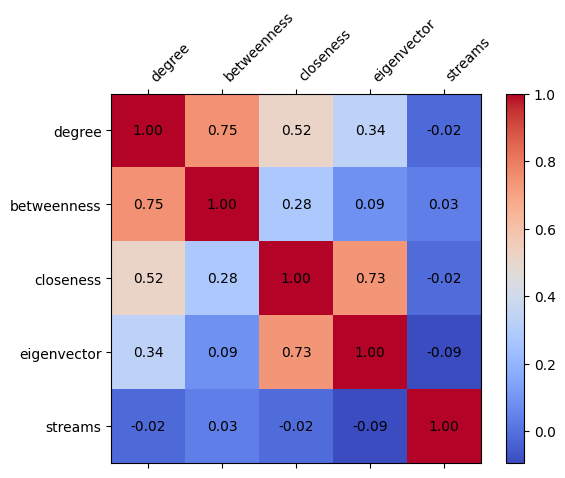

In [27]:
# calculate correlation between centrality measures
correlation = centrality_data.select_dtypes(include=[np.number]).corr()

# plot the correlation matrix with values
fig, ax = plt.subplots()
cax = ax.matshow(correlation, cmap='coolwarm')

# Add color bar
fig.colorbar(cax)

# Set axis labels
ax.set_xticks(range(len(correlation.columns)))
ax.set_yticks(range(len(correlation.columns)))
ax.set_xticklabels(correlation.columns, rotation=45, ha='left')
ax.set_yticklabels(correlation.columns)

# Add correlation values
for (i, j), val in np.ndenumerate(correlation.values):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.show()

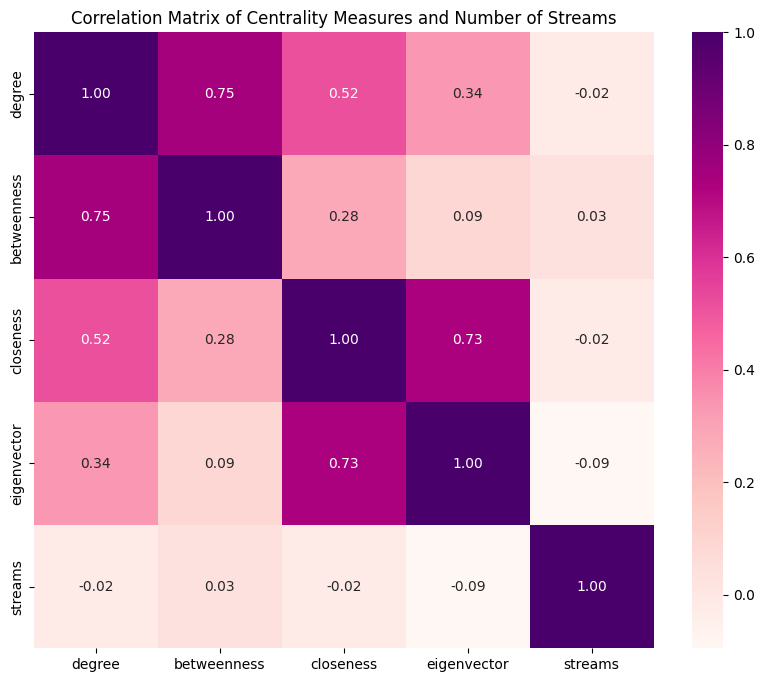

In [28]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='RdPu', fmt=".2f")
plt.title('Correlation Matrix of Centrality Measures and Number of Streams')
plt.show()

In [29]:
centrality_data.head()

,song_id,degree,betweenness,closeness,eigenvector,streams
0,"""Slut!"" (Taylor's Version) (From The Vault)",1,0.000000,0.089078,8.152470e-02,239579759
1,...Ready For It?,15,0.002968,0.087134,2.640158e-02,695895392
2,A Perfectly Good Heart,7,0.000000,0.000000,5.473646e-43,25204096
3,A Place in this World,13,0.000278,0.005698,5.760491e-14,40680546
4,Afterglow,23,0.006506,0.133112,1.862103e-01,368409481


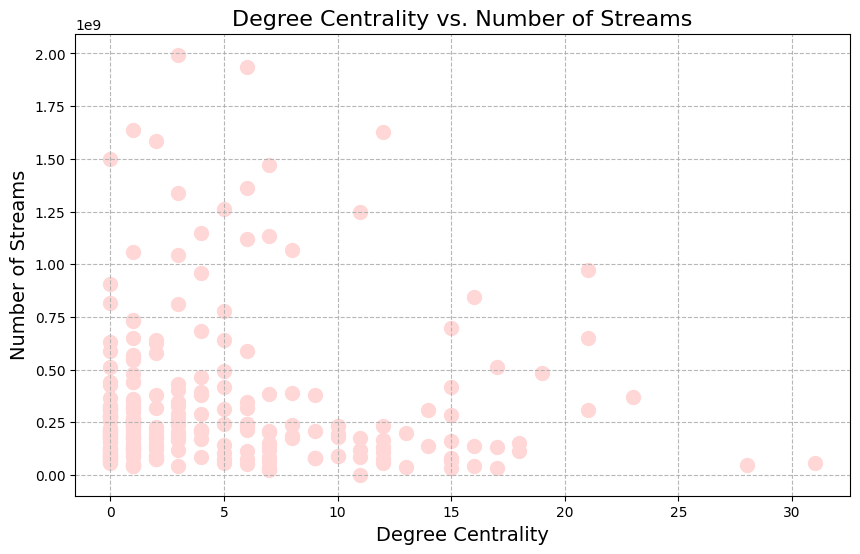

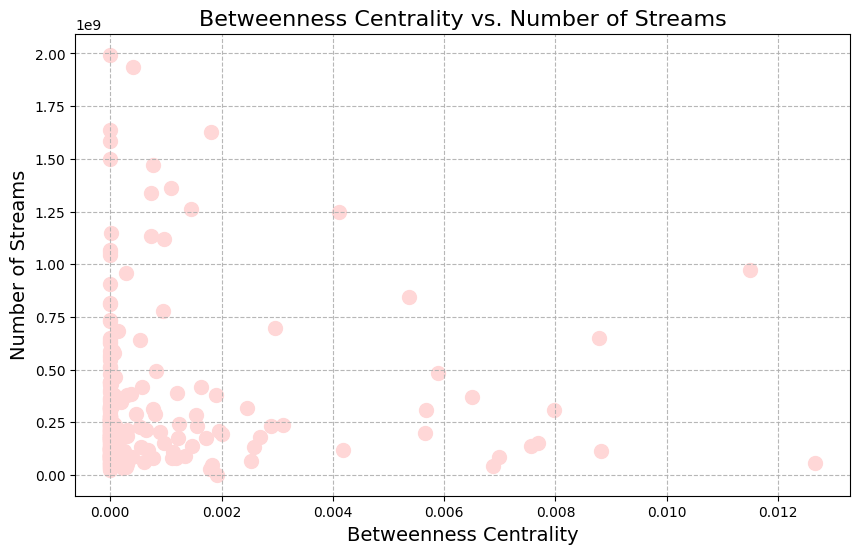

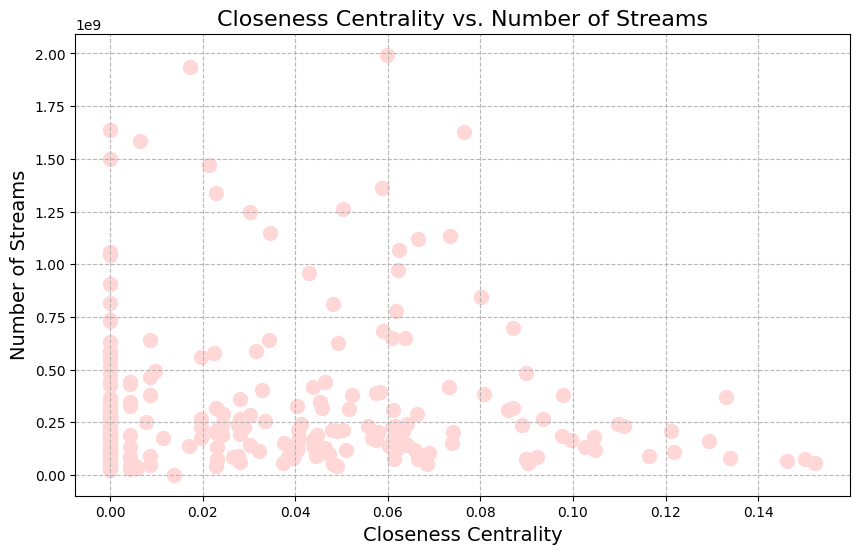

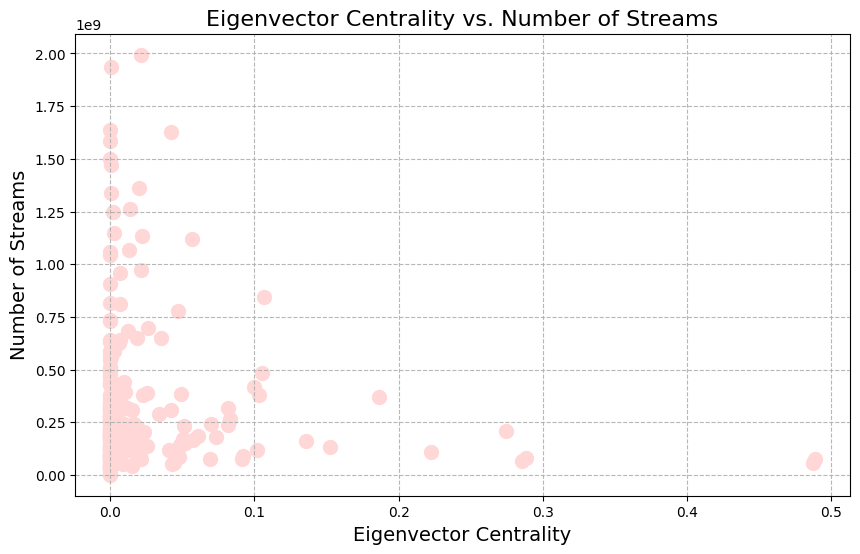

In [31]:
# Define a function to create scatter plots with enhanced aesthetics
def plot_centrality_vs_streams(x, y, xlabel, ylabel, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='#ffd7d7', alpha=1, s=100)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.title(title, fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.9)
    plt.show()

# Plotting Degree Centrality vs. Number of Streams
plot_centrality_vs_streams(centrality_data['degree'], centrality_data['streams'],
                           'Degree Centrality', 'Number of Streams', 'Degree Centrality vs. Number of Streams')

# Repeat for other centrality measures
plot_centrality_vs_streams(centrality_data['betweenness'], centrality_data['streams'],
                           'Betweenness Centrality', 'Number of Streams', 'Betweenness Centrality vs. Number of Streams')

plot_centrality_vs_streams(centrality_data['closeness'], centrality_data['streams'],
                           'Closeness Centrality', 'Number of Streams', 'Closeness Centrality vs. Number of Streams')

plot_centrality_vs_streams(centrality_data['eigenvector'], centrality_data['streams'],
                           'Eigenvector Centrality', 'Number of Streams', 'Eigenvector Centrality vs. Number of Streams')


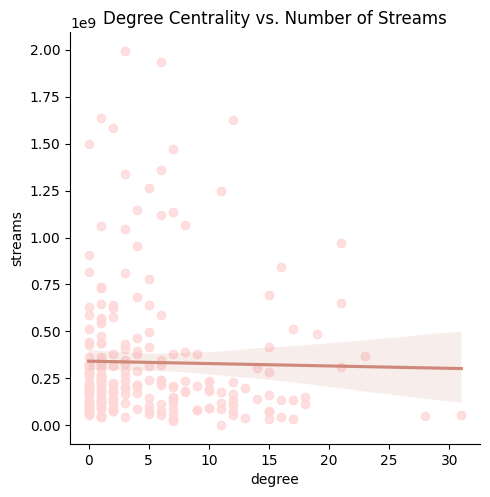

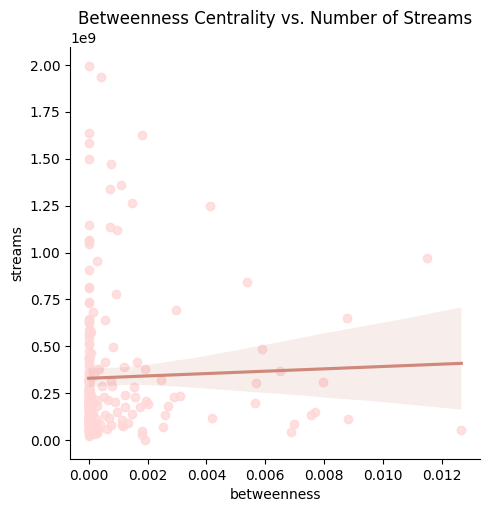

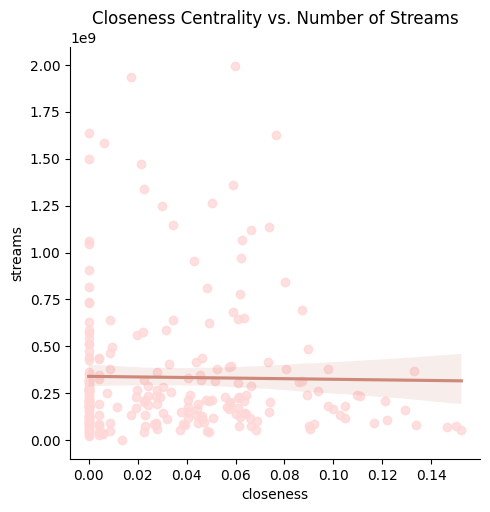

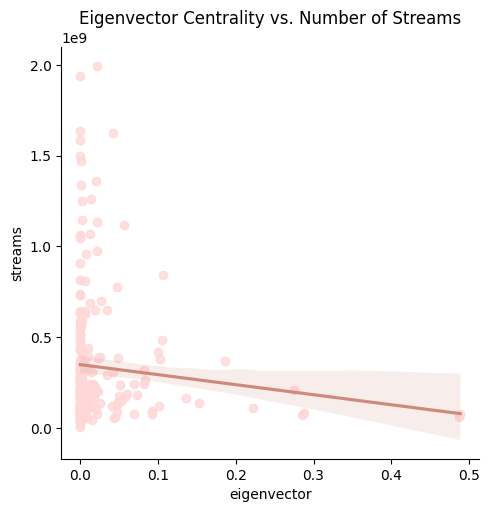

In [32]:
# Scatter plots with regression lines for individual centrality measures
sns.lmplot(x='degree', y='streams', data=centrality_data, scatter_kws={'color': '#ffd7d7'}, line_kws={'color': '#cf897a'})
plt.title('Degree Centrality vs. Number of Streams')
plt.show()

sns.lmplot(x='betweenness', y='streams', data=centrality_data, scatter_kws={'color': '#ffd7d7'}, line_kws={'color': '#cf897a'})
plt.title('Betweenness Centrality vs. Number of Streams')
plt.show()

sns.lmplot(x='closeness', y='streams', data=centrality_data, scatter_kws={'color': '#ffd7d7'}, line_kws={'color': '#cf897a'})
plt.title('Closeness Centrality vs. Number of Streams')
plt.show()

sns.lmplot(x='eigenvector', y='streams', data=centrality_data, scatter_kws={'color': '#ffd7d7'}, line_kws={'color': '#cf897a'})
plt.title('Eigenvector Centrality vs. Number of Streams')
plt.show()

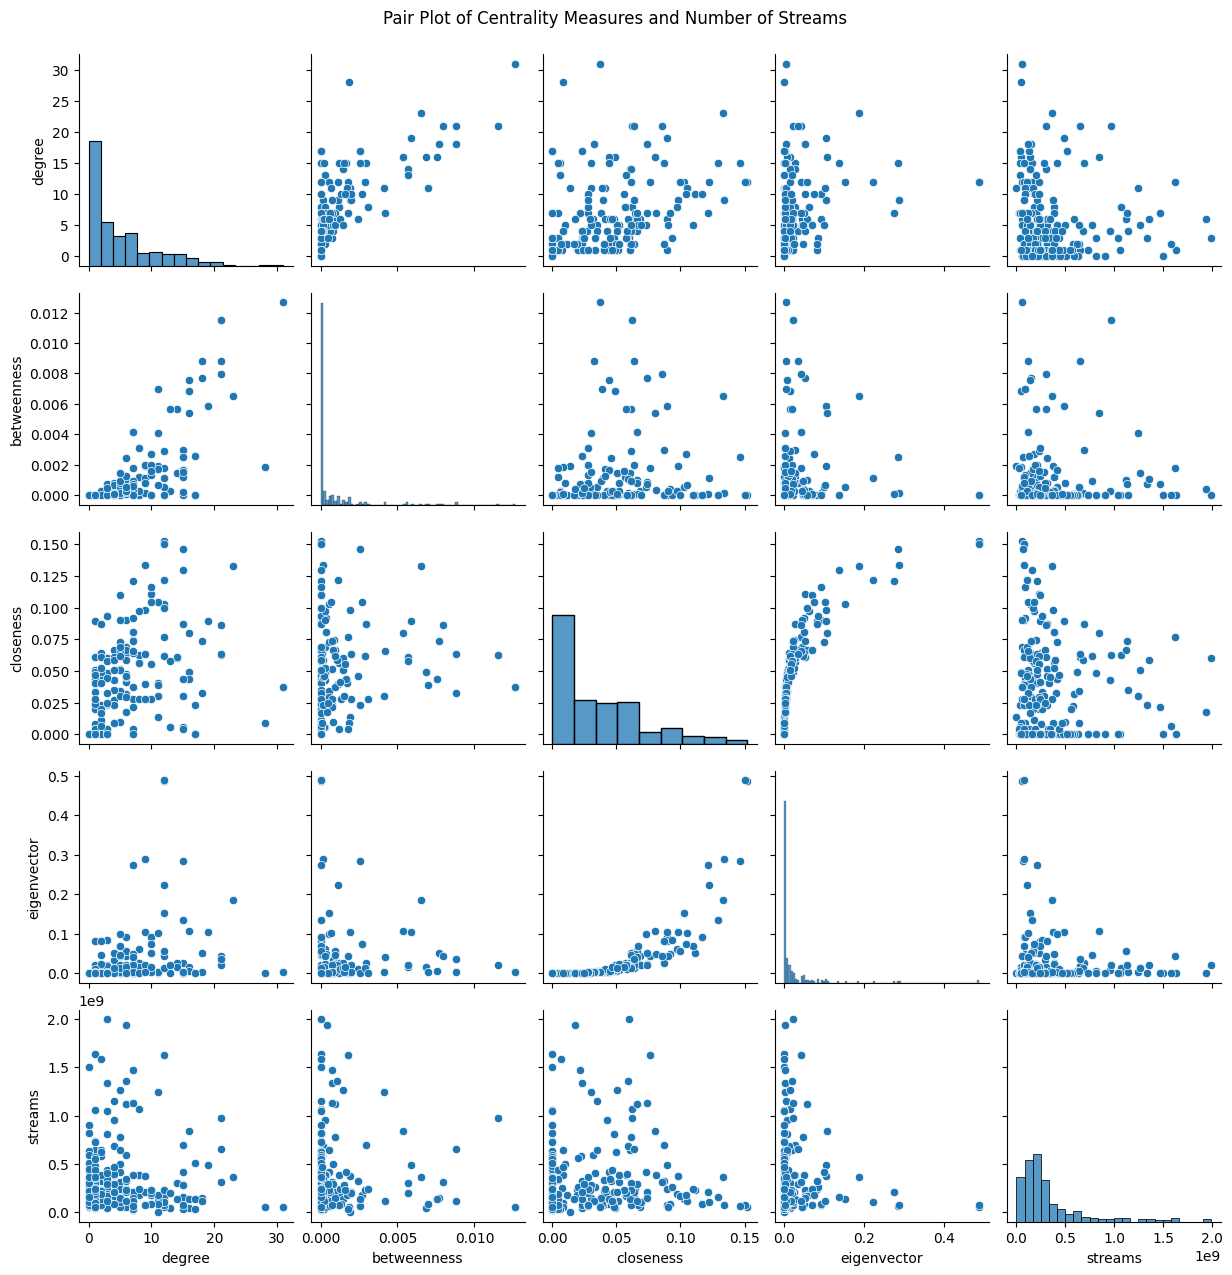

In [33]:
# Create the pair plot
pair_plot = sns.pairplot(centrality_data[['degree', 'betweenness', 'closeness', 'eigenvector', 'streams']])

# Customize the scatter plot colors
scatter_colors = ['blue', 'green', 'red', 'purple', 'orange']

# Iterate through the axes and set custom colors
for i, ax in enumerate(pair_plot.axes.flat):
    if ax is not None:
        # Check if the plot is a scatter plot
        if ax.get_xlabel() in centrality_data.columns and ax.get_ylabel() in centrality_data.columns:
            for line in ax.get_lines():
                line.set_color(scatter_colors[i % len(scatter_colors)])

# Add a title to the pair plot
plt.suptitle('Pair Plot of Centrality Measures and Number of Streams', y=1.02)
plt.show()

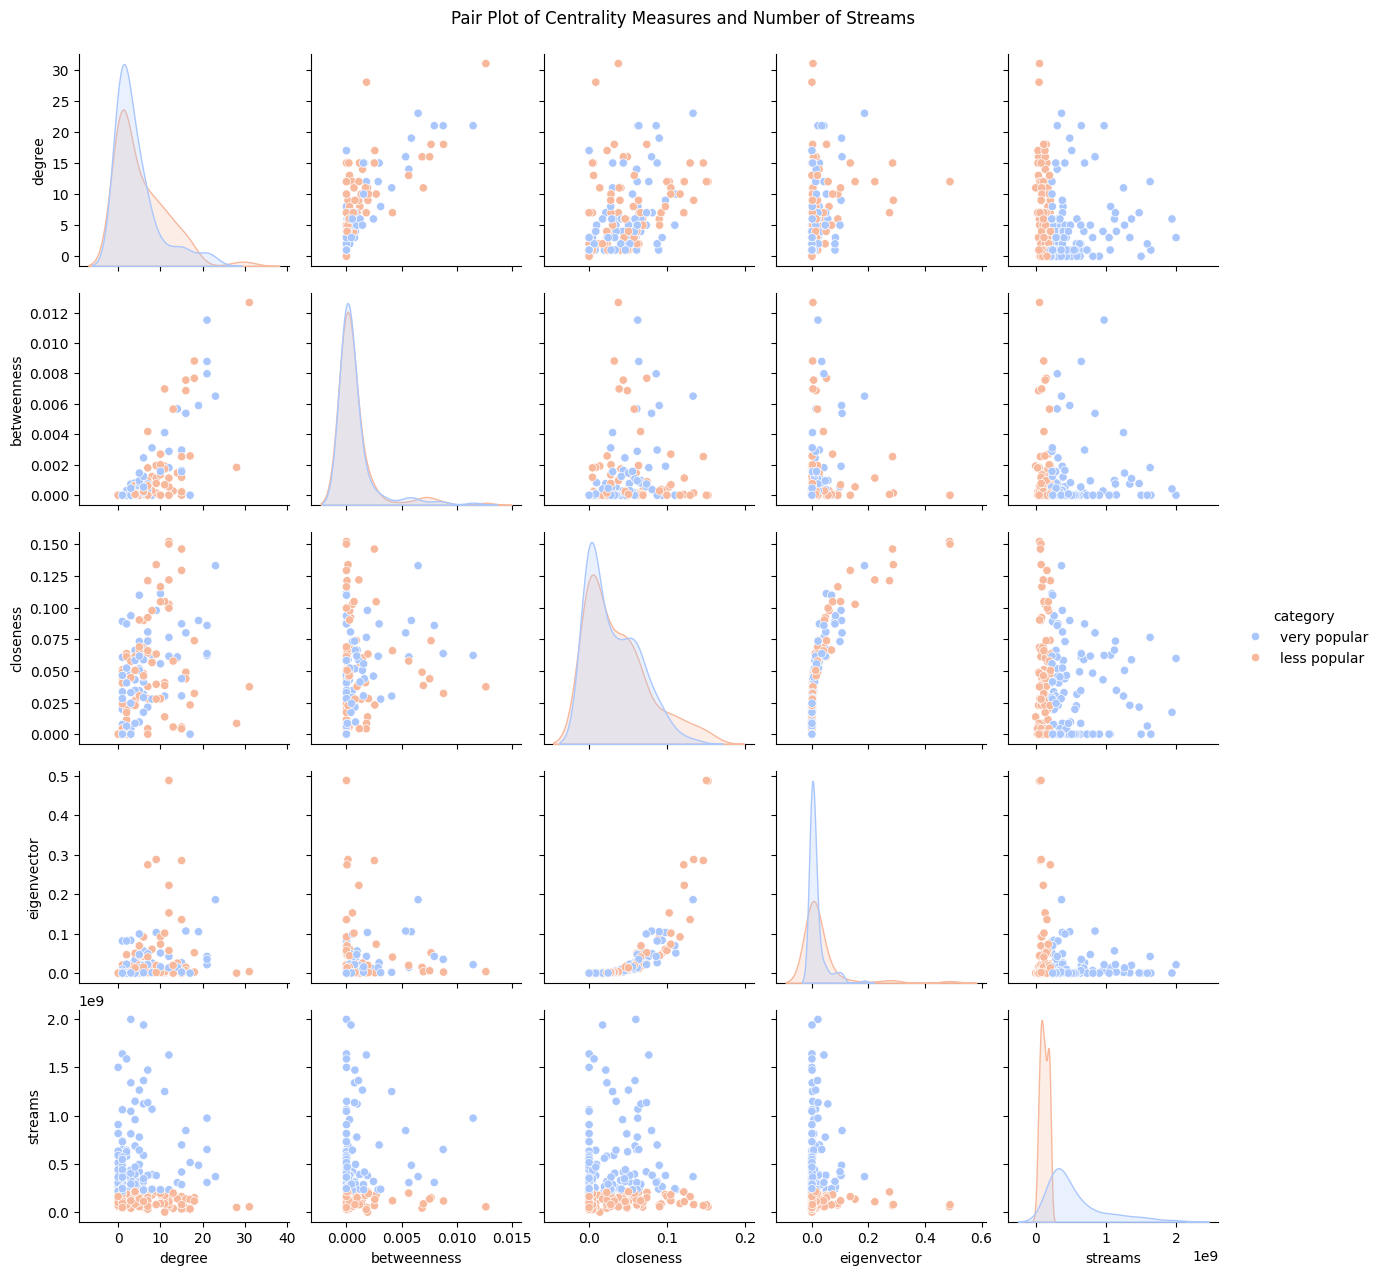

In [34]:
# Assuming we have a categorical variable to use for hue, e.g., 'category'
# You can create a dummy categorical variable for demonstration
centrality_data['category'] = np.where(centrality_data['streams'] > centrality_data['streams'].median(), 'very popular', 'less popular')

# Create a pair plot using the hue parameter
sns.pairplot(centrality_data[['degree', 'betweenness', 'closeness', 'eigenvector', 'streams', 'category']],
             hue='category', palette='coolwarm')
plt.suptitle('Pair Plot of Centrality Measures and Number of Streams', y=1.02)
plt.show()

### Analysis of Results and Conclusions

**Categorization Justification**:
The songs were categorized into "very popular" and "less popular" based on the median number of Spotify streams. Songs with streams above the median are classified as "very popular," while those below are "less popular." This approach ensures a balanced distribution and utilizes a robust measure of central tendency.

**Impact of Re-released Songs**:
It's important to note that some of Taylor Swift's popular songs might be those she re-released due to her issues with her former record label. These re-releases have their streams summed up, potentially boosting their popularity metrics.

### Analysis of Pair Plot

1. **Degree Centrality vs. Streams**:
   - **Observation**: There is a slight negative correlation between degree centrality and the number of streams, especially for the most popular songs.
   - **Conclusion**: Songs with higher degree centrality are not necessarily the ones with the highest number of streams. This suggests that simply having more connections (or shared top words with other songs) does not directly correlate with popularity. The popular songs might not be those with the highest number of connections but those that are strategically well-positioned or have other enhancing factors.

2. **Betweenness Centrality vs. Streams**:
   - **Observation**: Betweenness centrality is very low for most songs and does not show a clear pattern with the number of streams.
   - **Conclusion**: Betweenness centrality does not seem to be a strong indicator of a song's popularity. This indicates that acting as a bridge between songs (in terms of shared top words) does not significantly impact the number of streams. 

3. **Closeness Centrality vs. Streams**:
   - **Observation**: There is a noticeable clustering of higher streams with higher closeness centrality, but it's not a strong trend.
   - **Conclusion**: Songs that are more central in terms of closeness centrality (i.e., closer to all other songs in terms of shared words) might have a slight advantage in gaining streams. This suggests a moderate relationship where more central songs have a better reach or influence, possibly aiding in their popularity.

4. **Eigenvector Centrality vs. Streams**:
   - **Observation**: There is a slight negative correlation between eigenvector centrality and the number of streams.
   - **Conclusion**: Songs that are connected to other highly connected songs (high eigenvector centrality) are not necessarily the ones with the most streams. This indicates that being connected to other popular songs does not guarantee higher streams, pointing to the complexity of factors driving song popularity beyond mere network position.

5. **Streams Distribution**:
   - **Observation**: The distribution of streams shows a clear distinction between the very popular and less popular songs. Very popular songs are more spread out, while less popular songs are clustered at the lower end of the streams spectrum.
   - **Conclusion**: There is a clear bifurcation in the popularity of songs, with a small number of songs achieving very high streams and a larger number of songs with lower streams. This highlights the disparity in popularity where a few songs dominate in streams.

### Consideration of Re-released Songs

Given that some of Taylor Swift’s songs were re-released and their streams were summed, these songs likely appear more popular in the dataset:

- **Impact of Re-releases**: Re-released songs might have artificially inflated streams due to summing streams across different versions. This could skew the centrality measures, particularly degree and closeness, making these songs appear more central or well-connected due to multiple releases.
- **Strategic Positioning**: Re-released songs, through their multiple versions and summed streams, could gain better network positioning, enhancing their visibility and stream counts.

### General Conclusions

1. **Centrality Measures and Popularity**:
   - Centrality measures alone do not show strong correlations with the number of streams. This suggests that factors beyond network centrality, such as marketing efforts, song quality, and the artist's popularity at the time of release, play more significant roles in determining a song's popularity.
   - Closeness centrality shows a slight advantage for popular songs, indicating that being more central in terms of shared top words can help in gaining streams but is not the sole factor.

2. **Impact of Re-released Songs**:
   - The re-released songs likely contribute to the higher stream counts and centrality measures observed in very popular songs. Taylor Swift’s strategy of re-releasing songs has effectively boosted their popularity by increasing their connectivity and centrality within the network.

3. **Need for Multivariate Analysis**:
   - To gain more insights, consider additional variables like release year, album, and marketing efforts. A multivariate regression analysis could help identify key predictors of streams, offering a more comprehensive understanding of what drives song popularity.

In summary, while network centrality measures provide some insights, they do not fully explain song popularity. The re-release strategy and other external factors significantly contribute to the observed popularity trends.

# Same previous analysis but instead of categorizing between very popular and less popular songs, group them according to the album

In [55]:
# Create a DataFrame for analysis
centrality_data2 = pd.DataFrame({
    'song_id': degree.keys(),
    'degree': degree.values(),
    'betweenness': betweenness.values(),
    'closeness': closeness.values(),
    'eigenvector': eigenvector.values()
})

# Add the number of streams to the DataFrame
streams = nx.get_node_attributes(G, 'spotify_streams')
streams_data = pd.DataFrame(streams.items(), columns=['song_id', 'streams'])

albums = nx.get_node_attributes(G, 'album')
albums_data = pd.DataFrame(albums.items(), columns=['song_id', 'album'])

# Merge centrality measures with streams data
centrality_data2 = centrality_data2.merge(streams_data, on='song_id')
centrality_data2 = centrality_data2.merge(albums_data, on='song_id')

# print how many rows and columns the DataFrame has
print(centrality_data2.shape)
# Sum the streams if a node has a list with more than one value
centrality_data2['streams'] = centrality_data2['streams'].apply(lambda x: sum(x) if isinstance(x, list) else x)
# take the first album if a node has a list with more than one value
centrality_data2['album'] = centrality_data2['album'].apply(lambda x: x[0] if isinstance(x, list) else x)

# print the updated DataFrame
print(centrality_data2.head())

(235, 7)
                                       song_id  degree  betweenness  \
0  "Slut!" (Taylor's Version) (From The Vault)       1     0.000000   
1                             ...Ready For It?      15     0.002968   
2                       A Perfectly Good Heart       7     0.000000   
3                        A Place in this World      13     0.000278   
4                                    Afterglow      23     0.006506   

   closeness   eigenvector    streams  \
0   0.089078  8.152470e-02  239579759   
1   0.087134  2.640158e-02  695895392   
2   0.000000  5.473646e-43   25204096   
3   0.005698  5.760491e-14   40680546   
4   0.133112  1.862103e-01  368409481   

                                            album  
0                1989 (Taylor's Version) [Deluxe]  
1                                      reputation  
2                                    Taylor Swift  
3  reputation Stadium Tour Surprise Song Playlist  
4                                           Lover  


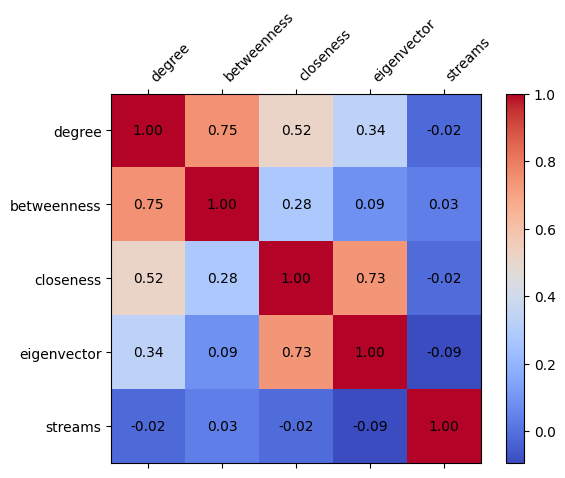

In [56]:
# calculate correlation between centrality measures
correlation2 = centrality_data2.select_dtypes(include=[np.number]).corr()

# plot the correlation2 matrix with values
fig, ax = plt.subplots()
cax = ax.matshow(correlation2, cmap='coolwarm')

# Add color bar
fig.colorbar(cax)

# Set axis labels
ax.set_xticks(range(len(correlation2.columns)))
ax.set_yticks(range(len(correlation2.columns)))
ax.set_xticklabels(correlation2.columns, rotation=45, ha='left')
ax.set_yticklabels(correlation2.columns)

# Add correlation2 values
for (i, j), val in np.ndenumerate(correlation2.values):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.show()

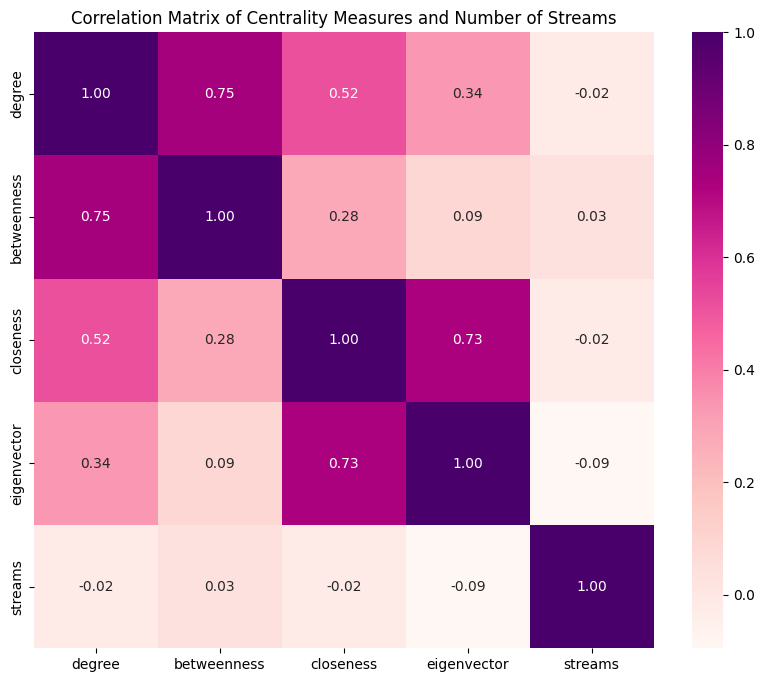

In [57]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation2, annot=True, cmap='RdPu', fmt=".2f")
plt.title('Correlation Matrix of Centrality Measures and Number of Streams')
plt.show()

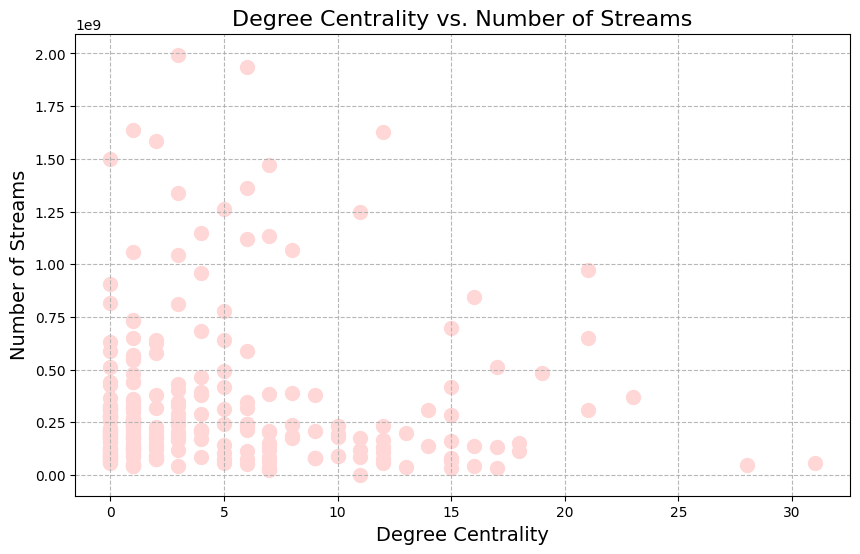

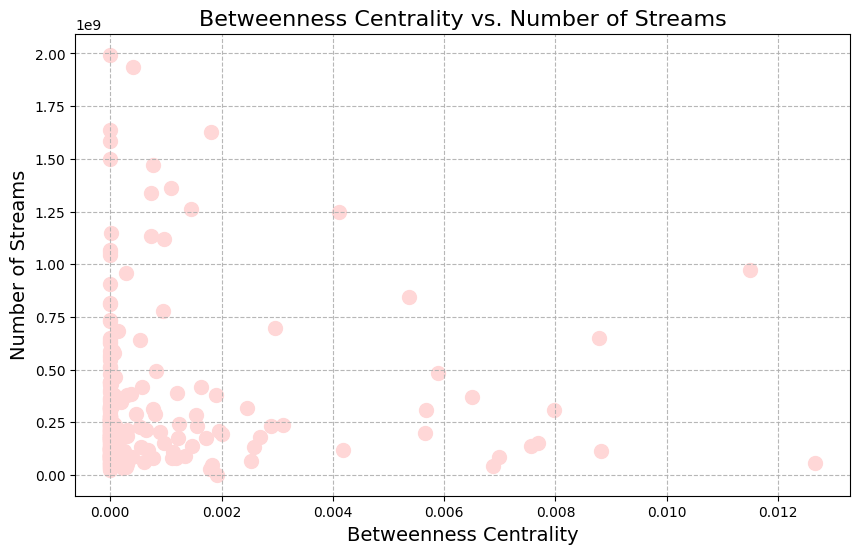

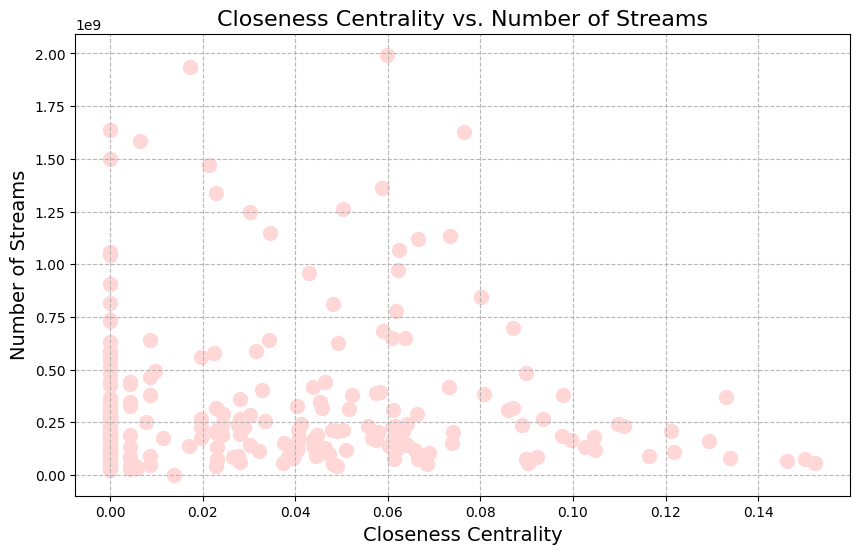

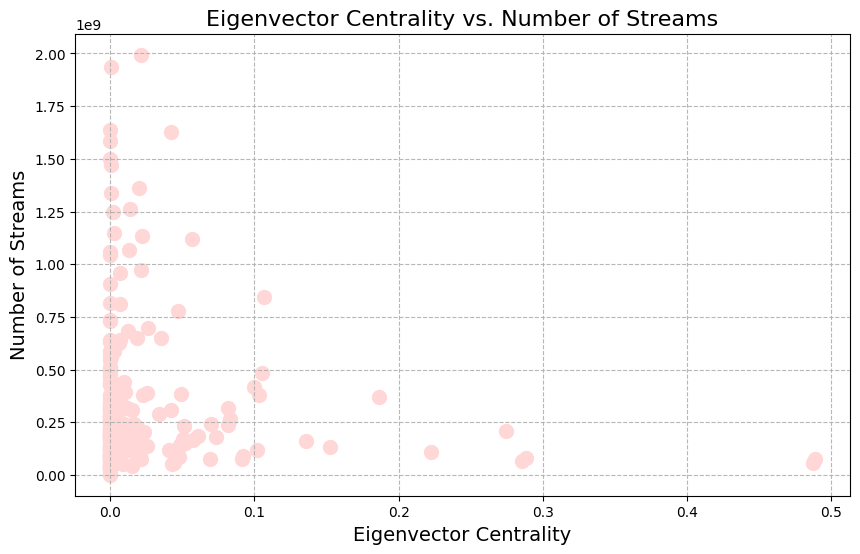

In [58]:
# Plotting Degree Centrality vs. Number of Streams
plot_centrality_vs_streams(centrality_data2['degree'], centrality_data2['streams'],
                           'Degree Centrality', 'Number of Streams', 'Degree Centrality vs. Number of Streams')

# Repeat for other centrality measures
plot_centrality_vs_streams(centrality_data2['betweenness'], centrality_data2['streams'],
                           'Betweenness Centrality', 'Number of Streams', 'Betweenness Centrality vs. Number of Streams')

plot_centrality_vs_streams(centrality_data2['closeness'], centrality_data2['streams'],
                           'Closeness Centrality', 'Number of Streams', 'Closeness Centrality vs. Number of Streams')

plot_centrality_vs_streams(centrality_data2['eigenvector'], centrality_data2['streams'],
                           'Eigenvector Centrality', 'Number of Streams', 'Eigenvector Centrality vs. Number of Streams')


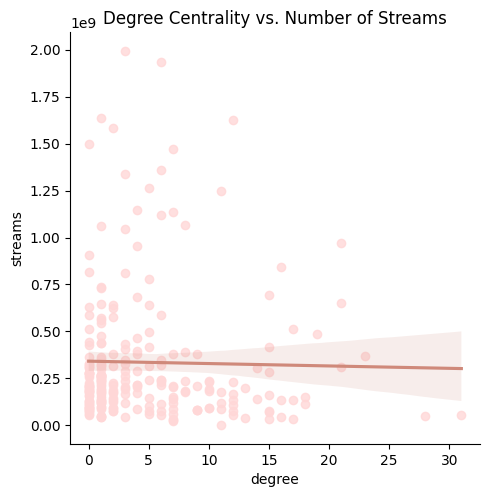

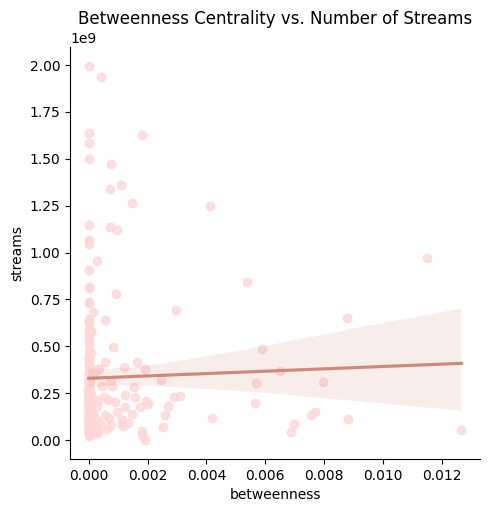

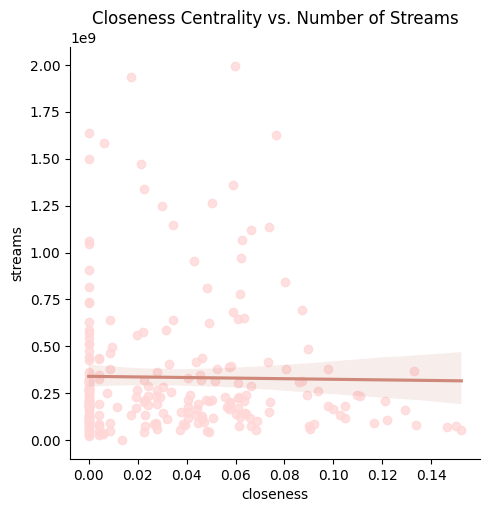

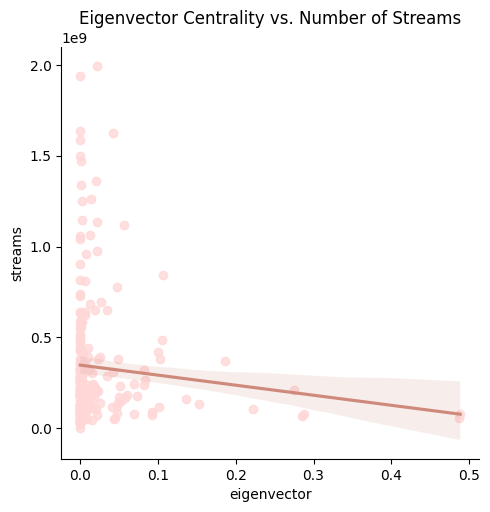

In [59]:
# Scatter plots with regression lines for individual centrality measures
sns.lmplot(x='degree', y='streams', data=centrality_data2, scatter_kws={'color': '#ffd7d7'}, line_kws={'color': '#cf897a'})
plt.title('Degree Centrality vs. Number of Streams')
plt.show()

sns.lmplot(x='betweenness', y='streams', data=centrality_data2, scatter_kws={'color': '#ffd7d7'}, line_kws={'color': '#cf897a'})
plt.title('Betweenness Centrality vs. Number of Streams')
plt.show()

sns.lmplot(x='closeness', y='streams', data=centrality_data2, scatter_kws={'color': '#ffd7d7'}, line_kws={'color': '#cf897a'})
plt.title('Closeness Centrality vs. Number of Streams')
plt.show()

sns.lmplot(x='eigenvector', y='streams', data=centrality_data2, scatter_kws={'color': '#ffd7d7'}, line_kws={'color': '#cf897a'})
plt.title('Eigenvector Centrality vs. Number of Streams')
plt.show()

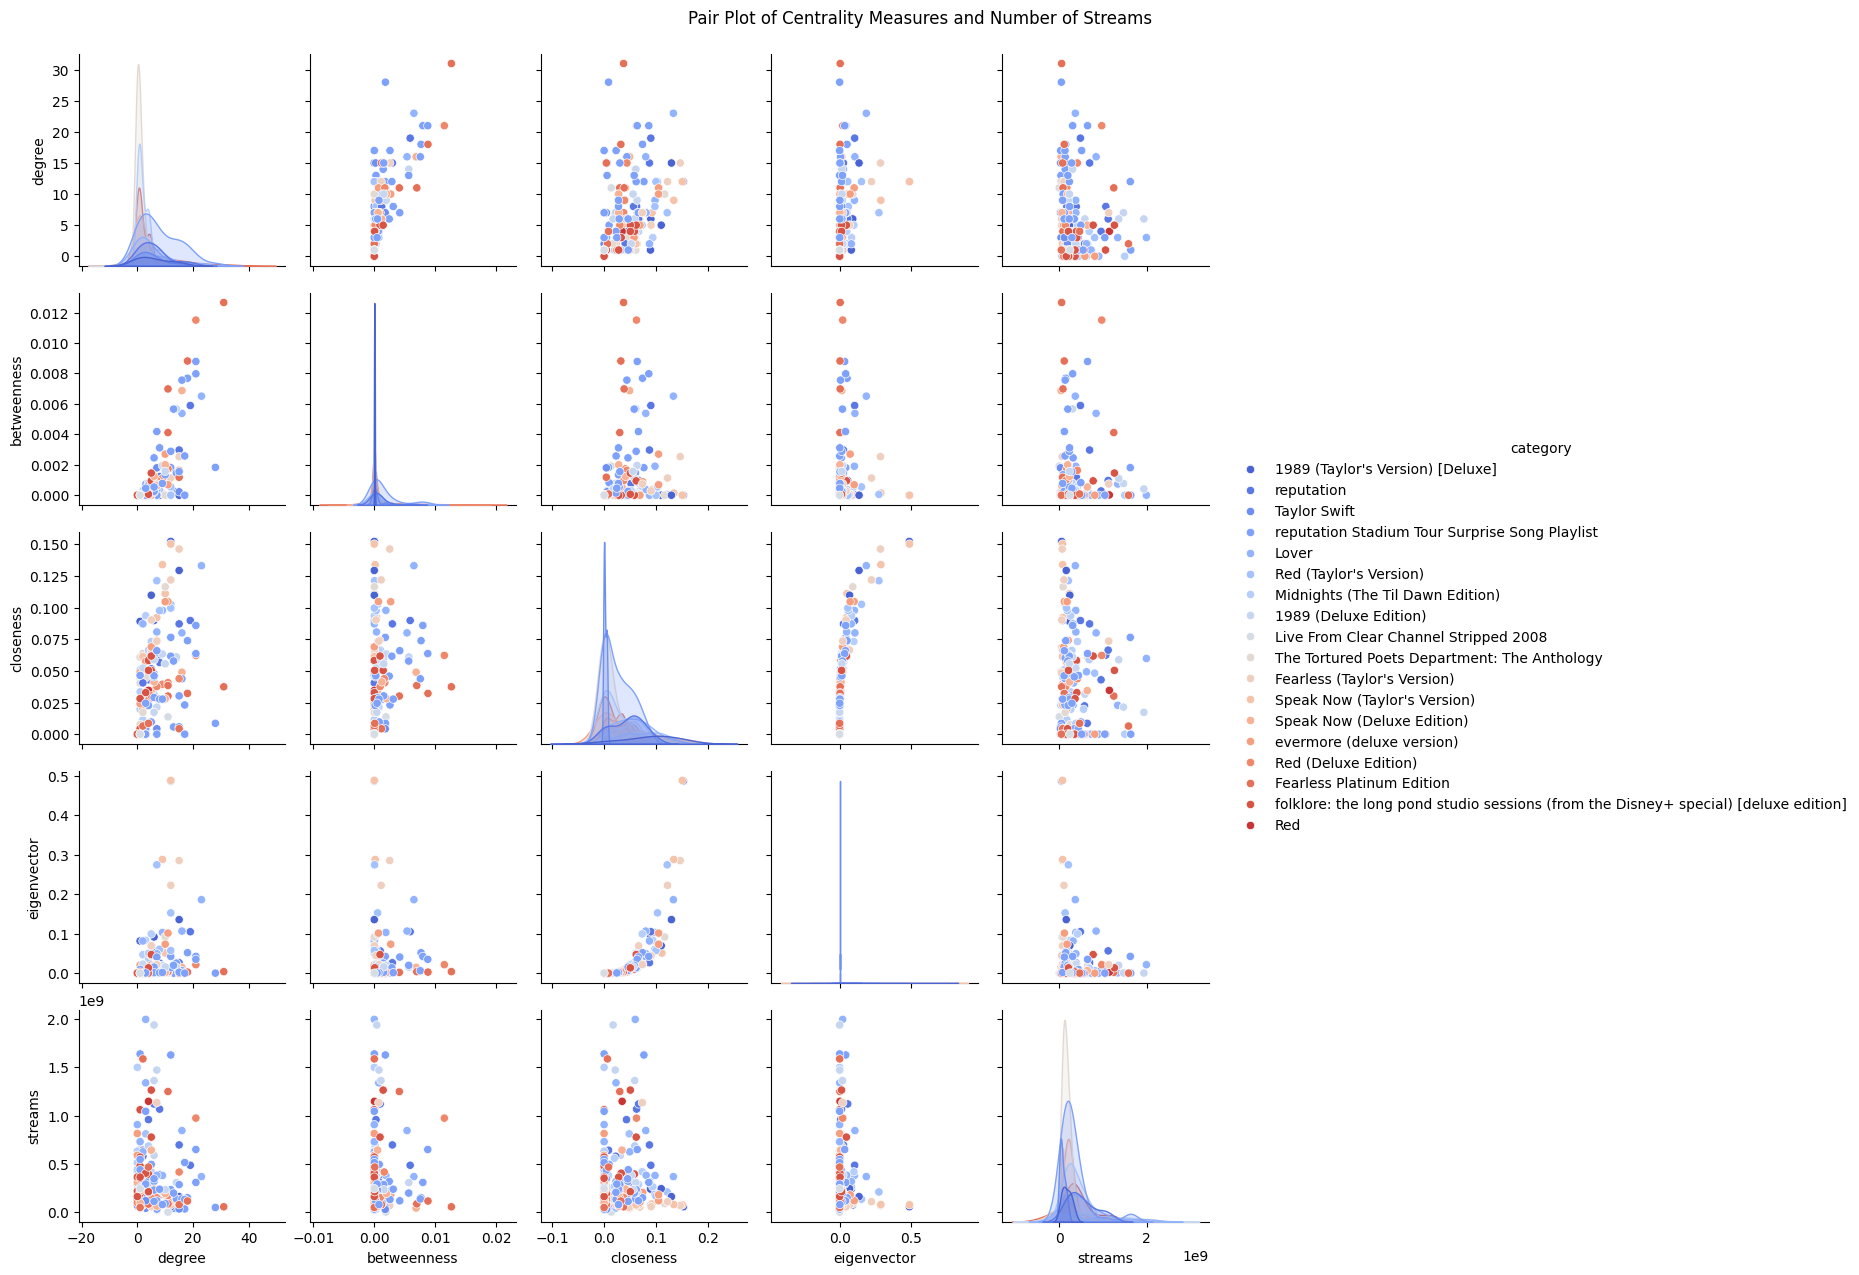

In [62]:
# Assuming we have a categorical variable to use for hue, e.g., 'category'
# You can create a dummy categorical variable for demonstration
# centrality_data2['category'] = np.where(centrality_data2['streams'] > centrality_data2['streams'].median(), 'very popular', 'less popular')

# list of albums
list_albums = centrality_data2['album'].unique()

# categorize each song per album and the name of the category is the album name
for album in list_albums:
    centrality_data2['category'] = np.where(centrality_data2['album'] == album, album, centrality_data2['category'])

# Create a pair plot using the hue parameter
sns.pairplot(centrality_data2[['degree', 'betweenness', 'closeness', 'eigenvector', 'streams', 'category']],
             hue='category', palette='coolwarm')
plt.suptitle('Pair Plot of Centrality Measures and Number of Streams', y=1.02)
plt.show()